## Test generation of the local potential

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# add pstudio to the search path
import sys
sys.path.append('..')

In [2]:
from pstudio import AE, set_output
from pstudio.vloc import generate_vloc_RRKJ, generate_vloc_TM
#set_output(sys.stdout)

ae = AE('C', xcname='LDA', relativity='SR')
ae.run()


scalar relativistic atomic calculation for C (Carbon, Z=6)
configuration: 1s2 2s2 2p2, 6 electrons
exchange-correlation: lda_x+lda_c_pz
2001 radial gridpoints in [1e-05,100]

Converged in 63 iterations

Energy contributions:
------------------------------------------------------------------------
Kinetic:      +37.269733 Ha     +1014.161102 eV 
Ionic:        -87.619337 Ha     -2384.243613 eV 
Hartree:      +17.627276 Ha      +479.662609 eV 
XC:            -4.732032 Ha      -128.765157 eV 
------------------------------------------------------------------------
Total:        -37.454308 Ha     -1019.183627 eV 

state      eigenvalue      eigenvalue        rmax
------------------------------------------------------------------------
1s2         -9.961701 Ha  -271.071678 eV    0.175
2s2         -0.501784 Ha   -13.654238 eV    1.218
2p2         -0.199279 Ha    -5.422666 eV    1.189



In [54]:
rc = 1.2
vloc_rrkj = generate_vloc_RRKJ(ae.vtot, ae.rgd, rc, verbose=True)
vloc_tm = generate_vloc_TM(ae.vtot, ae.rgd, rc, verbose=True)

Local potential from RRKJ2 pseudization: rc=1.1981
AE norm within rc       : +3615079.969005
0-th AE derivative at rc: -1.367436
1-th AE derivative at rc: +2.179730
2-th AE derivative at rc: -4.726946
qi               :  [1.66769046 4.08650735]
estimated cutoff : 8.34977 Ha

Local potential from RRKJ2+TM pseudization: rc=1.1981
AE norm within rc       : +3615079.969005
0-th AE derivative at rc: -1.367436
1-th AE derivative at rc: +2.179730
2-th AE derivative at rc: -4.726946
qi               :  4.013830286427082
estimated cutoff : 8.05542 Ha



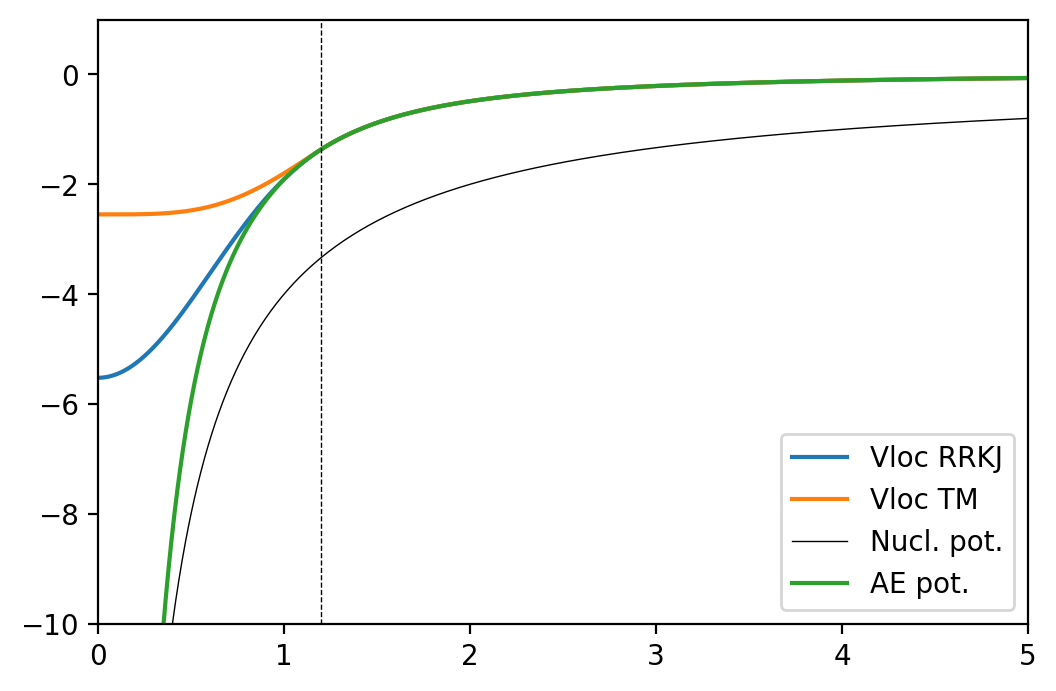

In [55]:
r = ae.rgd.r
fig = plt.figure(figsize=(6,4), dpi=200)
plt.plot(r, vloc_rrkj, label='Vloc RRKJ')
plt.plot(r, vloc_tm, label='Vloc TM')
plt.plot(r, -4.0/r, color='black', linewidth=0.5, label='Nucl. pot.')
plt.plot(r, ae.vtot, label='AE pot.')

plt.axvline(rc, linestyle='dashed', color='black', linewidth=0.5)
plt.xlim(0,5)
plt.ylim(-10,1)
plt.legend()
plt.show()

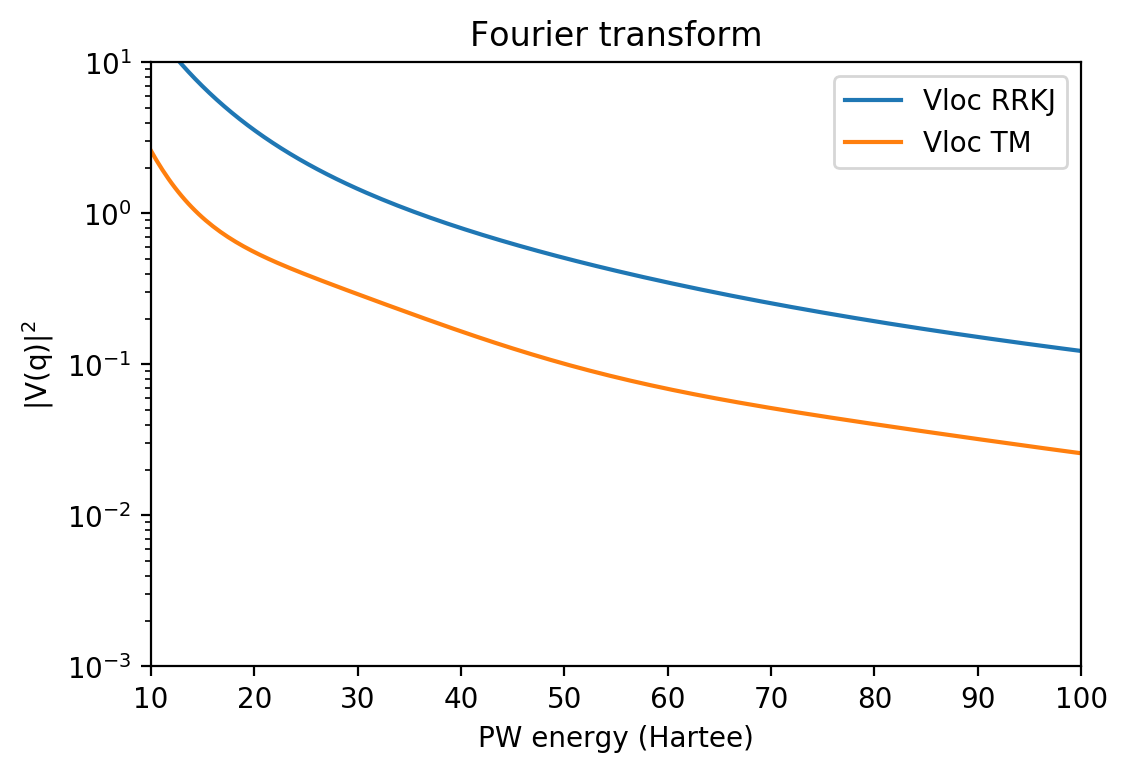

In [56]:
plt.figure(figsize=(6,4), dpi=200)

q, fq = ae.rgd.fft(vloc_rrkj)
plt.plot(0.5*q*q, fq*fq, label='Vloc RRKJ')

q, fq = ae.rgd.fft(vloc_tm)
plt.plot(0.5*q*q, fq*fq, label='Vloc TM')

plt.xlim(10,100)
plt.xlabel('PW energy (Hartee)')

plt.ylim(1e-3,10)
plt.yscale('log')
plt.ylabel('|V(q)|$^2$')

plt.title('Fourier transform')
plt.legend()
plt.show()